In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("wine_data.csv",header=None,usecols =[0,1,2])
df.columns=['Class label','Alcohol','Malic acid']

In [3]:
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

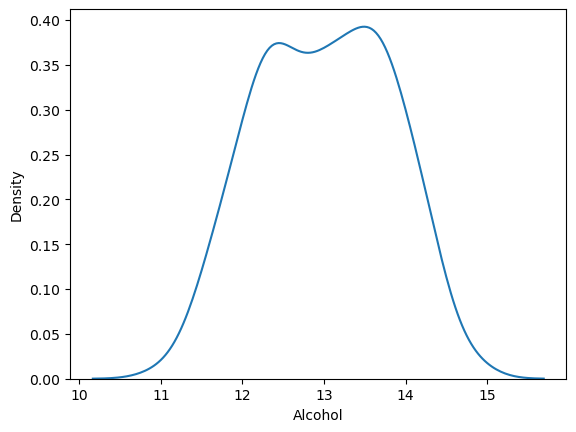

In [4]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

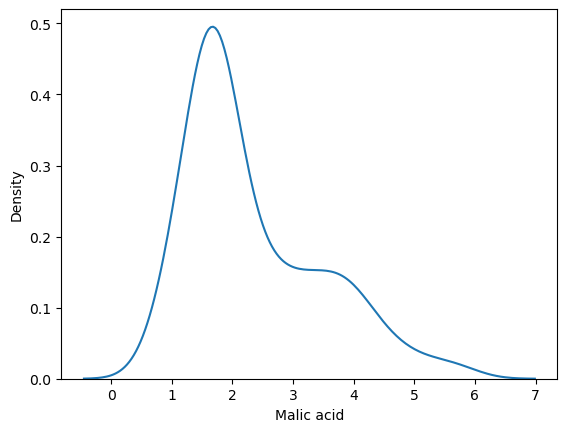

In [5]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

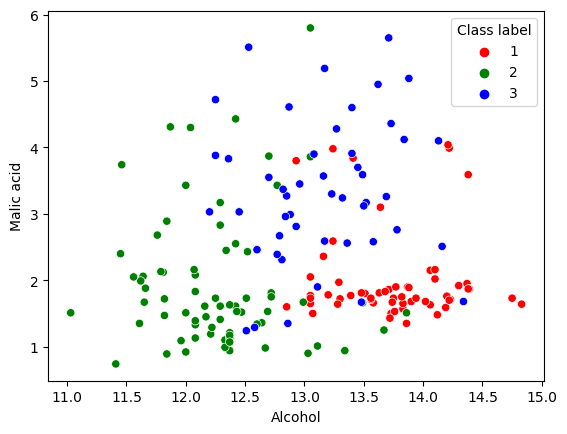

In [6]:
color_dict={1:'red',2:'green',3:'blue'}
sns.scatterplot(x=df['Alcohol'],y=df['Malic acid'],hue=df['Class label'],palette=color_dict)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('Class label',axis=1),df['Class label'],test_size=0.3,random_state = 0)

In [8]:
x_train.shape,x_test.shape

((124, 2), (54, 2))

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [10]:
x_train_scaler = pd.DataFrame(x_train_scaler,columns = x_train.columns)
x_test_scaler = pd.DataFrame(x_test_scaler,columns = x_test.columns)

In [11]:
np.round(x_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [12]:
np.round(x_train_scaler.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


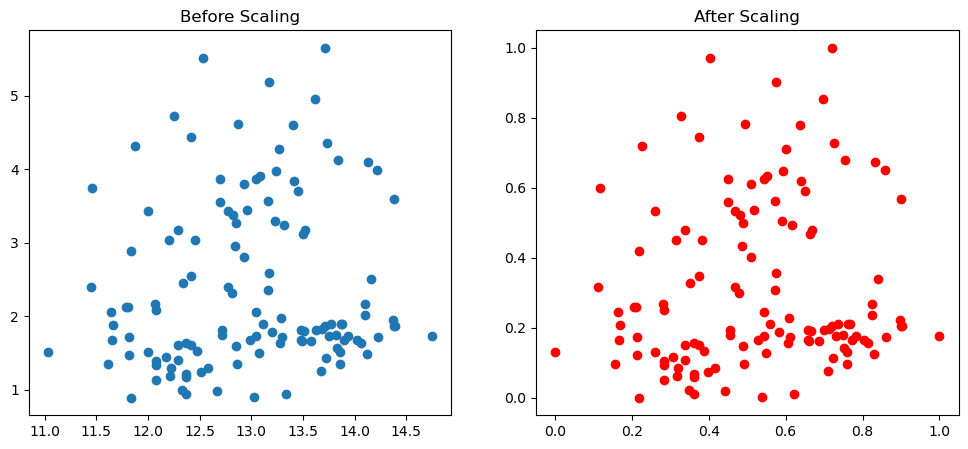

In [13]:
fig,(ax1, ax2) = plt.subplots(ncols=2,figsize= (12,5))
ax1.scatter(x_train['Alcohol'],x_train['Malic acid'])
ax1.set_title("Before Scaling")

ax2.scatter(x_train_scaler["Alcohol"], x_train_scaler['Malic acid'],color='red')
ax2.set_title("After Scaling")

plt.show()

<Axes: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

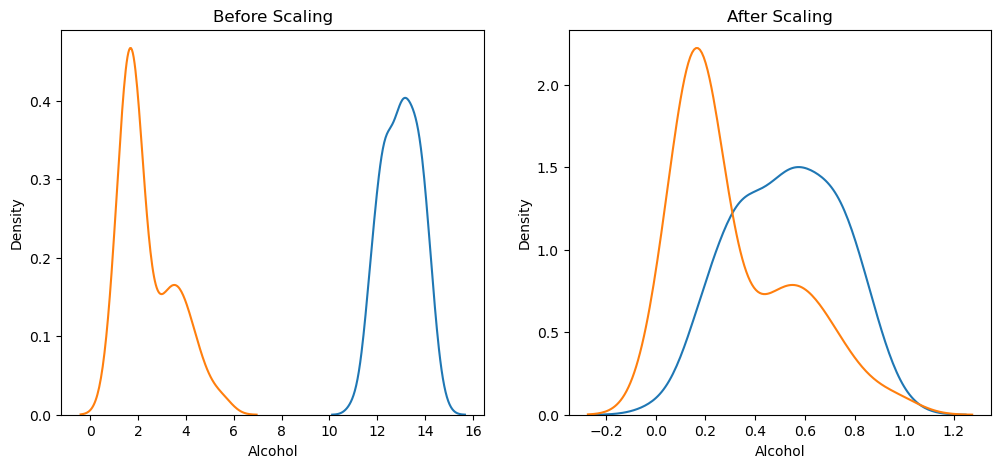

In [14]:
fig, (ax1,ax2)= plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Alcohol'],ax=ax1)
sns.kdeplot(x_train['Malic acid'],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaler['Alcohol'],ax=ax2)
sns.kdeplot(x_train_scaler['Malic acid'],ax=ax2)

<Axes: title={'center': 'Alcohol Distribution After Scaling'}, xlabel='Alcohol', ylabel='Density'>

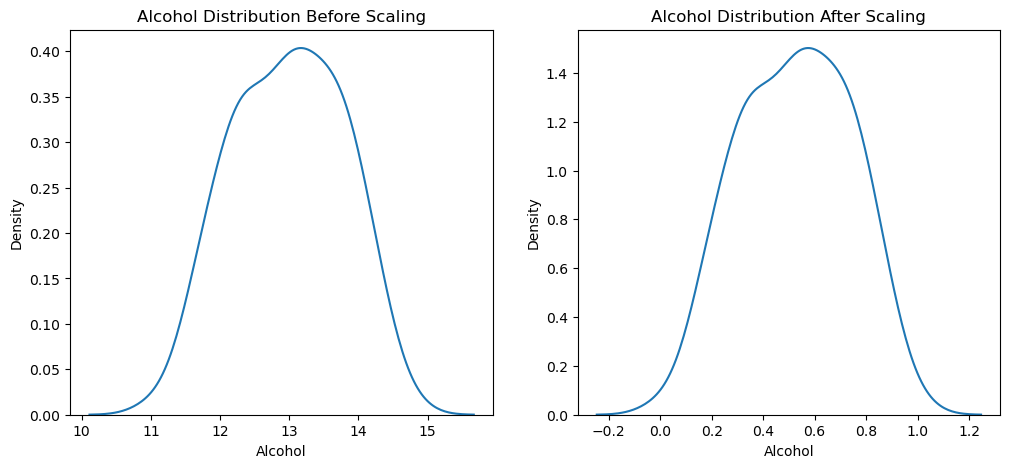

In [15]:
fig, (ax1,ax2)= plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Alcohol Distribution Before Scaling")
sns.kdeplot(x_train['Alcohol'],ax=ax1)

ax2.set_title("Alcohol Distribution After Scaling")
sns.kdeplot(x_train_scaler['Alcohol'],ax=ax2)

# RobustScaler

In [16]:
from sklearn.preprocessing import Rob ustScaler
scaler =RobustScaler()
x_train_Rscaler = scaler.fit_transform(x_train)
x_test_Rscaler = scaler.transform(x_test)

In [17]:
x_train_Rscaler = pd.DataFrame(x_train_Rscaler,columns = x_train.columns)
x_test_Rscaler = pd.DataFrame(x_test_Rscaler,columns = x_test.columns)

In [18]:
np.round(x_train_Rscaler.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,-0.0,0.3
std,0.6,0.7
min,-1.6,-0.6
25%,-0.5,-0.2
50%,0.0,0.0
75%,0.5,0.8
max,1.3,2.3


<Axes: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

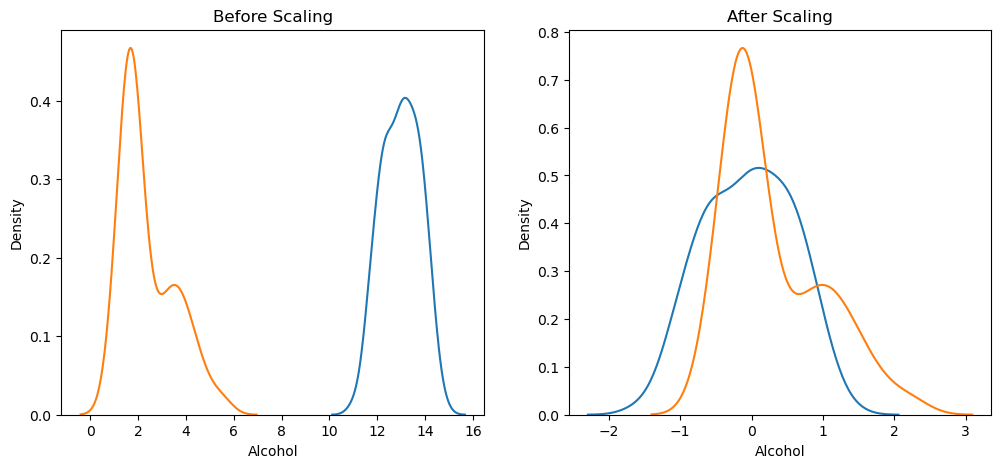

In [19]:
fig, (ax1,ax2)= plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(x_train['Alcohol'],ax=ax1)
sns.kdeplot(x_train['Malic acid'],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(x_train_Rscaler['Alcohol'],ax=ax2)
sns.kdeplot(x_train_Rscaler['Malic acid'],ax=ax2)